In [63]:
import pandas as pd
import numpy as np

In [64]:
data = {}

In [65]:
exp = 'exp2021_07_14_1552'

In [66]:
algos = ['reinforce', 'reinforce with state count', 'reinforce with sequence count', 'reinforce with state and sequence count']

In [67]:
data[algos[0]] = pd.read_csv(f'data/{exp}/reinforce_res.csv', header=[0, 1], skipinitialspace=True)
data[algos[1]] = pd.read_csv(f'data/{exp}/reinforce_res_st.csv', header=[0, 1], skipinitialspace=True)
data[algos[2]] = pd.read_csv(f'data/{exp}/reinforce_res_seq.csv', header=[0, 1], skipinitialspace=True)
data[algos[3]] = pd.read_csv(f'data/{exp}/reinforce_res_st_seq.csv', header=[0, 1], skipinitialspace=True)

print("res_r: ", np.sum(np.sum(data[algos[0]])))
print("res_r_st: ", np.sum(np.sum(data[algos[1]])))
print("res_r_seq: ", np.sum(np.sum(data[algos[2]])))
print("res_r_st_seq: ", np.sum(np.sum(data[algos[3]])))

res_r:  19250.0
res_r_st:  18450.0
res_r_seq:  71150.0
res_r_st_seq:  52850.0


In [68]:
labels = set(data[algos[0]].columns.get_level_values(0))
num_runs = len(data[algos[0]].columns)

In [69]:
results = {}
for L in labels:
    for alg in algos:
        # results[(L, alg)] = (data[str(alg)][str(L)] > 0).sum()
        results[(L, alg)] = data[str(alg)][str(L)].sum()

In [70]:
results = pd.DataFrame.from_dict(results, orient='columns')
results

10                                                           \
  reinforce reinforce with state count reinforce with sequence count   
0    1050.0                      750.0                       12650.0   
1     600.0                     4100.0                        8950.0   
2    5600.0                     3250.0                        9350.0   
3    2350.0                      300.0                        8500.0   
4    7500.0                     4250.0                       12300.0   
5     300.0                      400.0                       10750.0   
6    1850.0                     5400.0                        8650.0   

                                           
  reinforce with state and sequence count  
0                                  4000.0  
1                                  7300.0  
2                                 10600.0  
3                                  6150.0  
4                                 10600.0  
5                                  4050.0  
6                                 10150.0

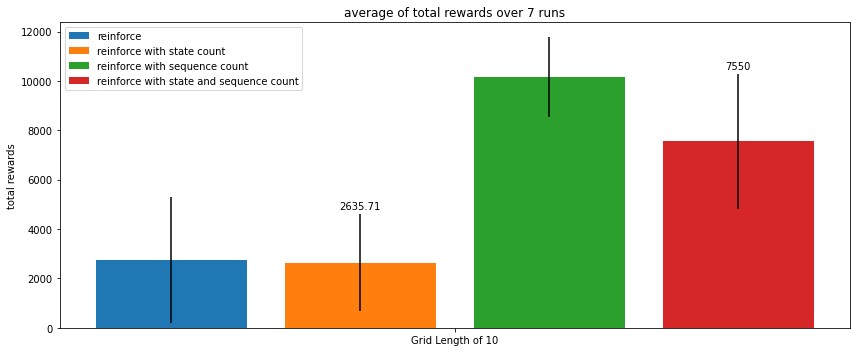

In [71]:
import matplotlib.pyplot as plt

labels = [f'Grid Length of {L}' for L in labels]

x = np.arange(len(labels))  
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 5))

data0 = results.xs(algos[0], axis=1, level=1, drop_level=False).values
data1 = results.xs(algos[1], axis=1, level=1, drop_level=False).values
data2 = results.xs(algos[2], axis=1, level=1, drop_level=False).values
data3 = results.xs(algos[3], axis=1, level=1, drop_level=False).values

mean0 = np.mean(data0)
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)

error0 = np.std(data0)
error1 = np.std(data1)
error2 = np.std(data2)
error3 = np.std(data3)

rects0 = ax.bar(x - 1.5*width, mean0, width*0.8, yerr=error0, ecolor='black', label=algos[0])
rects1 = ax.bar(x - 0.5*width, mean1, width*0.8, yerr=error1, ecolor='black', label=algos[1])
rects2 = ax.bar(x + 0.5*width, mean2, width*0.8, yerr=error2, ecolor='black', label=algos[2])
rects2 = ax.bar(x + 1.5*width, mean3, width*0.8, yerr=error3, ecolor='black', label=algos[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()